<a href="https://colab.research.google.com/github/SCS-Technology-and-Innovation/IntroComp/blob/main/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting data

Let's start with scatter plots for when we have two paired sets of observations. One of these will go on the *horizontal* axis (as an $x$ coordinate) and the other on the *vertical* axis (as a $y$ coordinate).

We need to generate some data that matches this description.

In [13]:
import numpy as np

n = 60
low = 10.2
high = 31.3
mu = 5.4
sigma = 1.3
x = np.random.uniform(low, high, n)
y = np.random.normal(mu, sigma, n)

print(x.min(), x.max())
print(y.mean(), y.std())

10.472216383511537 31.24225433488235
5.292998204614723 1.2348651037346423


The `matplotlib` library lets us easily plot this with *points* on a plane.

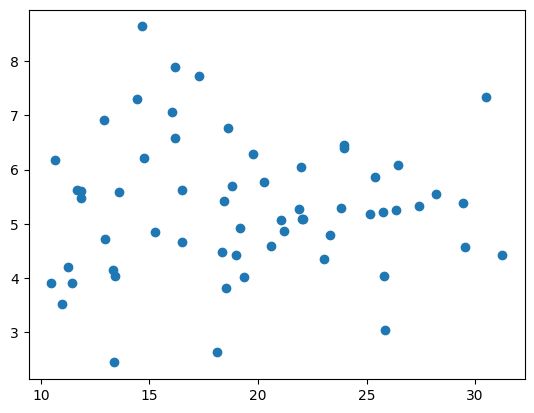

In [14]:
import matplotlib.pyplot as plt

plt.scatter(x, y) # horizontal first, vertical second

If the observation pairs are not independent from one another but form a *sequence* of sort (like a time series, for example), the data might be in fact better visualized as a curve.

In [22]:
slope = 5.0
intercept = -13.0

step = (high - low) / n
t = np.arange(low, high, step)

xnoise = 1.2
x2 = t + np.random.normal(0, xnoise, n)
x2.sort()

ynoise = 3.4
y2 = slope * x2 + intercept + np.random.normal(0, ynoise, n)

print(x2.min(), x2.max())
print(y2.min(), y2.max())

9.588135728866623 32.923329342242674
36.19416361734335 156.06593165683512


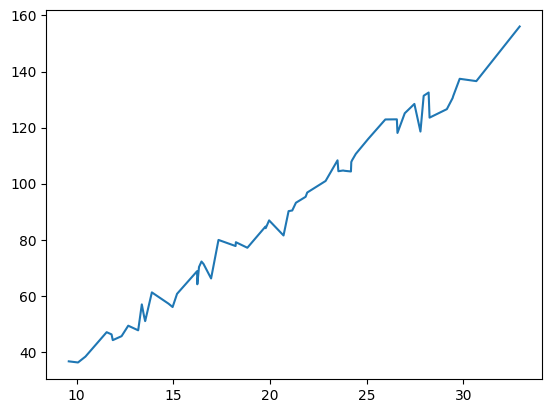

In [23]:
plt.plot(x2, y2)

If the data is one-dimensional (such as order totals from orders placed in an online store), both scatter plots and curves are uninformative. **Histograms** (as bar plots) are a good choice.

In [35]:
data = np.random.exponential(4.6, n)
ordertotals = 100 * np.round(data, decimals = 2)
print(ordertotals.min(), ordertotals.max())

7.000000000000001 2504.0


(array([24., 19.,  9.,  4.,  2.,  0.,  1.,  0.,  0.,  1.]),
 array([   7. ,  256.7,  506.4,  756.1, 1005.8, 1255.5, 1505.2, 1754.9,
        2004.6, 2254.3, 2504. ]),
 <BarContainer object of 10 artists>)

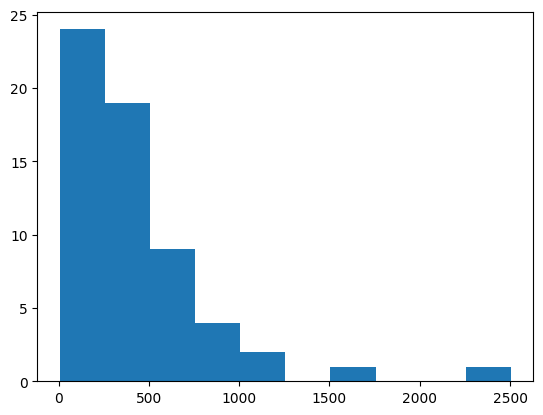

In [38]:
plt.hist(ordertotals, bins = 10) # to how many subintervals to divide the span

When some of the bars are much taller than others (like here, because of the exponential distribution that was used to generate the data), it is often useful to use a *logarithmic-scale* vertical axis instead.

(array([15.,  9., 11.,  8.,  5.,  4.,  3.,  1.,  2.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   7.  ,  131.85,  256.7 ,  381.55,  506.4 ,  631.25,  756.1 ,
         880.95, 1005.8 , 1130.65, 1255.5 , 1380.35, 1505.2 , 1630.05,
        1754.9 , 1879.75, 2004.6 , 2129.45, 2254.3 , 2379.15, 2504.  ]),
 <BarContainer object of 20 artists>)

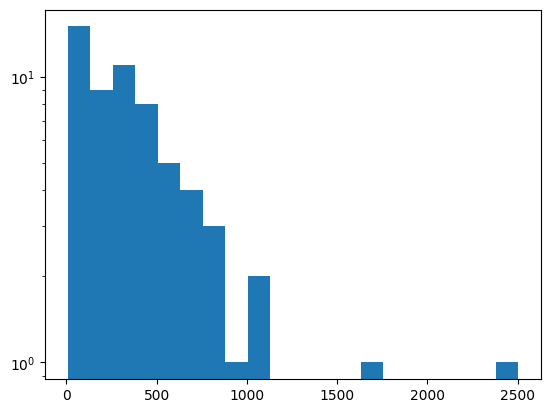

In [39]:
plt.hist(ordertotals, bins = 20, log = True)

If you have two or more datasets, you can overlay them.

(array([19., 12.,  7.,  4.,  8.,  4.,  3.,  1.,  1.,  0.,  0.,  1.]),
 array([  17.        ,  120.16666667,  223.33333333,  326.5       ,
         429.66666667,  532.83333333,  636.        ,  739.16666667,
         842.33333333,  945.5       , 1048.66666667, 1151.83333333,
        1255.        ]),
 <BarContainer object of 12 artists>)

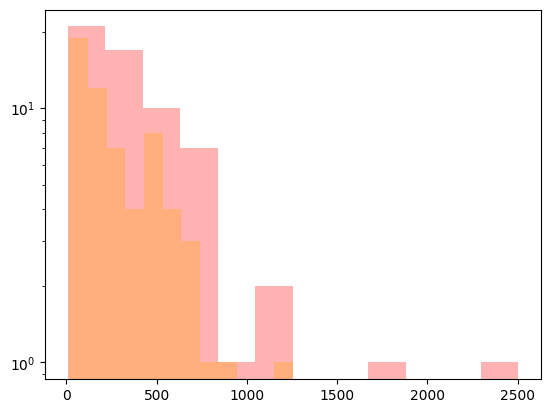

In [42]:
secondstore = 100 * np.round(np.random.exponential(3.6, n), decimals = 2)
plt.hist(ordertotals, bins = 12, log = True, color = 'red', alpha = 0.3)
plt.hist(secondstore, bins = 12, log = True, color = 'orange', alpha = 0.3)

If this is too much detail for your purposes, a boxplot just shows the *minimum*, the *maximum* (with the whiskers) and *quartiles* (25% and 75% with the box borders, 50% with the bar inside the box).

This makes it easier to compare several datasets side by side.

It is a bit of work to get two boxplots side by side with `matplotlib` alone, but if we put our data into a `pandas` dataframe, this becomes simple.

In [53]:
import pandas as pd
storenames = [ 'Downtown', 'South Shore' ]
firstStore = [ [ storenames[0], value ] for value in ordertotals ]
secondStore = [ [ storenames[1], value ] for value in secondstore ]
data = pd.DataFrame(firstStore + secondStore, columns = [ 'Store', 'Amount' ])

What's in it? Let's look at the first few rows.

In [54]:
data.head()

,Store,Amount
0,Downtown,149.0
1,Downtown,308.0
2,Downtown,764.0
3,Downtown,92.0
4,Downtown,518.0


And the last few?

In [55]:
data.tail()

,Store,Amount
115,South Shore,131.0
116,South Shore,117.0
117,South Shore,68.0
118,South Shore,68.0
119,South Shore,253.0


<Axes: title={'center': 'Amount'}, xlabel='[Store]'>

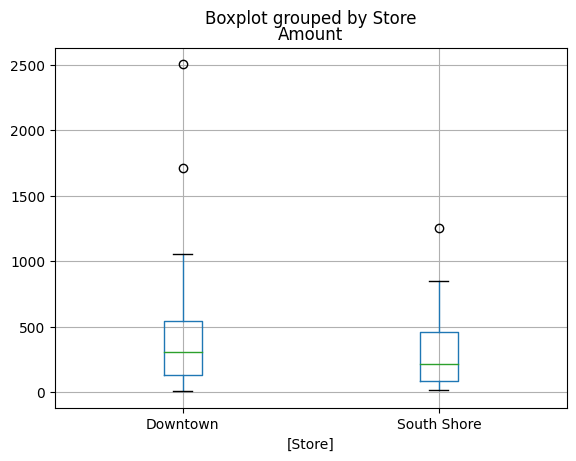

In [56]:
data.boxplot(by = 'Store')

If this is too scarce in terms of how the data is distributed but a histogram overlay is not nice to interpret, an excellent compromise is using **violinplots**.

A nice library for additional plots is `seaborn`.

<Axes: xlabel='Store', ylabel='Amount'>

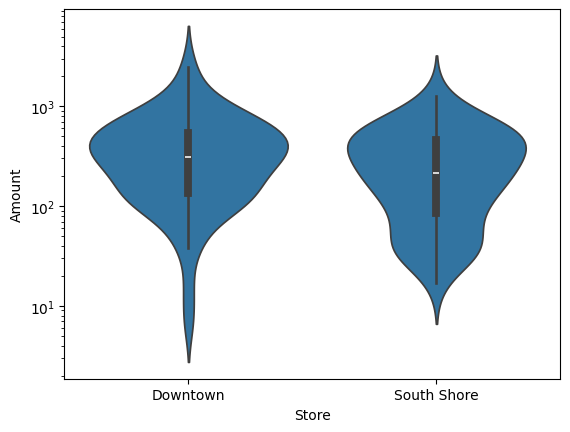

In [58]:
import seaborn as sns

sns.violinplot(data, x = 'Store', y = 'Amount', log_scale = True)